# Task 3

### 1. Read the provided description of the dataset, each variable, explain its meaning in clear terms and determine the data type 

* <b>UNEMP:</b> 
This variable represents the total unemployment rate as a percentage against all insured employees. <br>
Data Type: float


* <b>WAGES:</b>
This variable represents the average weekly earnings of all full time employees, in shillings.<br>
Data Type: float

* <b>BENEFITS:</b>
This variable represents the weekly benefit received by an adult male, with one adult and two children depending on him, in shillings. <br>
Data Type: float

* <b>BWRATIO:</b>
This variable is a measure of the ratio of BENEFITS relative to WAGES. It is referred to as the replacement rate.<br>
Data Type: float

* <b>NNP:</b>
This variable measures the total economic output using the Net National Product (NNP), which is measured in millions of the British Pound.<br>
Data Type: float

* <b>DEMAND:</b>
This variable represents the Demand Index, which is calculated as a ratio of NNP to NNP*, which is the trend value of the NNP.<br>
Data Type: float

### 2. Load the dataset using pandas  

In [1]:
import pandas as pd
import numpy as np

kochin = pd.read_csv('kochin.CSV', sep=';')

print(kochin)

    YEAR UNEMP  WAGES BENEFITS, BWRATIO,   NNP DEMAND
0   1920   3,9  73,85     11,33     0,15  3426   0,03
1   1921    17  70,58     16,83     0,24  3242  -0,05
2   1922  14,3  59,08     22,00     0,37  3384  -0,02
3   1923  11,7  55,46     22,00     0,40  3514   0,00
4   1924  10,3  56,00     23,67     0,42  3622   0,01
5   1925  11,3  56,35     27,00     0,48  3840   0,05
6   1926  12,5  55,77     27,00     0,48  3656  -0,02
7   1927   9,7  56,19     27,00     0,48  3937   0,04
8   1928  10,8  55,73     27,67     0,50  4003   0,04
9   1929  10,4  55,85     28,00     0,50  4097   0,04
10  1930  16,1  55,73     29,50     0,53  4082   0,02
11  1931  21,3  54,92     29,54     0,54  3832  -0,06
12  1932  22,1  54,04     27,25     0,50  3828  -0,08
13  1933  19,9  53,73     27,25     0,51  3899  -0,08
14  1934  16,7  54,27     28,63     0,53  4196  -0,02
15  1935  15,5  55,04     30,33     0,55  4365   0,00
16  1936  13,1  56,12     32,00     0,57  4498   0,01
17  1937  10,8  57,15     32

### 3. Experiment which type of chart is suitable for this type of data. 

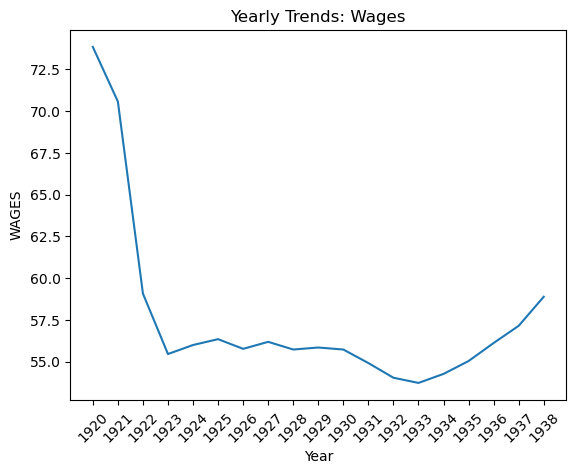

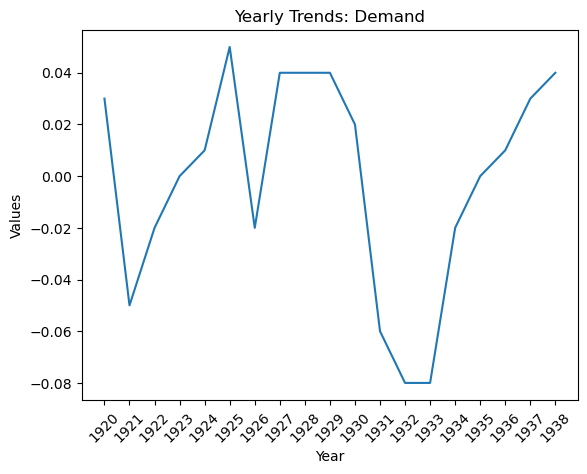

In [3]:
import matplotlib.pyplot as plt

# Extract the columns directly from the DataFrame
column_year = kochin['YEAR'].astype(int)
column_unemp = kochin['UNEMP'].str.replace(',', '.').astype(float)
column_wages = kochin['WAGES'].str.replace(',', '.').astype(float)
column_benefits = kochin['BENEFITS,'].str.replace(',', '.').astype(float)
column_bwratio = kochin['BWRATIO,'].str.replace(',', '.').astype(float)
column_nnp = kochin['NNP'].astype(float)
column_demand = kochin['DEMAND'].str.replace(',', '.').astype(float)


plt.plot(column_year , column_wages)
plt.xticks(np.arange(min(column_year), max(column_year) + 1, 1), rotation=45)
plt.xlabel('Year')
plt.ylabel('WAGES')
plt.title('Yearly Trends: Wages')
plt.show()

plt.plot(column_year , column_demand)
plt.xticks(np.arange(min(column_year), max(column_year) + 1, 1), rotation=45)
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Yearly Trends: Demand')
plt.show()

### 4. Visualize the temporal changes of unemployment during inter-war Britain. 


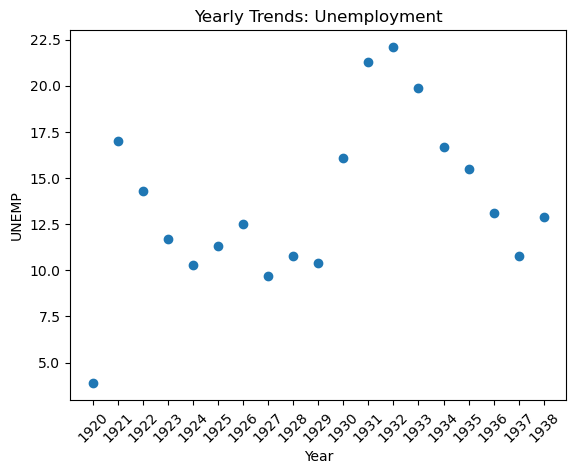

In [5]:
plt.scatter(column_year , column_unemp)
# Setting the x-axis to show all year values
plt.xticks(np.arange(min(column_year), max(column_year) + 1, 1), rotation=45)
plt.xlabel('Year')
plt.ylabel('UNEMP')
plt.title('Yearly Trends: Unemployment')
plt.show()

### 5. Create a visualization that supports or disproves Benjamin and Kochin’s hypothesis. 


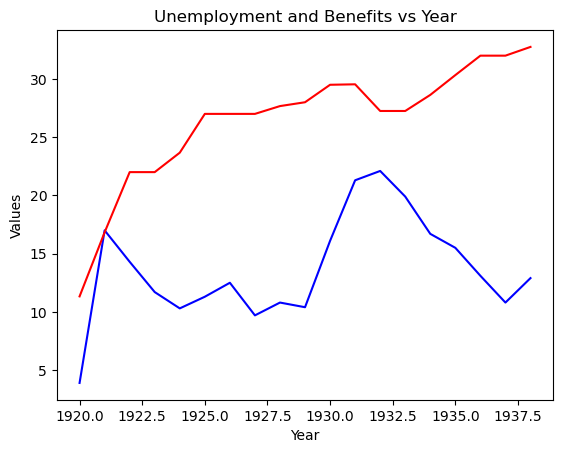

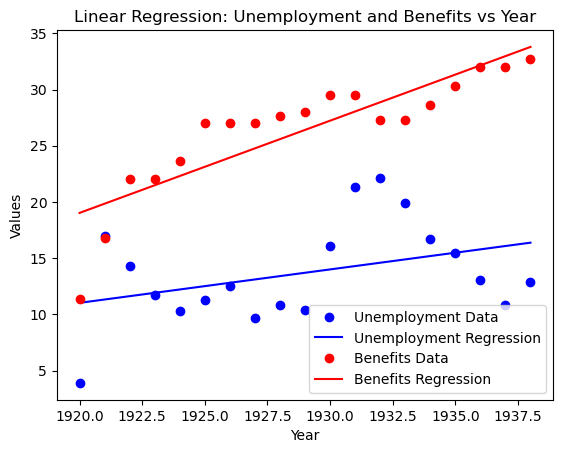

Unemployment:
Slope: 0.2973684210526315, Intercept: -559.9236842105262, R-squared: 0.14019789543953334

Benefits:
Slope: 0.8203157894736842, Intercept: -1555.9812631578948, R-squared: 0.7455222976856871
0.350683221761729


In [7]:
from scipy.stats import linregress

plt.plot(column_year, column_unemp, label='unemployment', color='blue')
plt.plot(column_year, column_benefits, label='benefits', color='red')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Unemployment and Benefits vs Year')
plt.show()


slope_unemp, intercept_unemp, r_value_unemp, p_value_unemp, std_err_unemp = linregress(column_year, column_unemp)
regression_line_unemp = slope_unemp * column_year + intercept_unemp
slope_benefits, intercept_benefits, r_value_benefits, p_value_benefits, std_err_benefits = linregress(column_year, column_benefits)
regression_line_benefits = slope_benefits * column_year + intercept_benefits

plt.plot(column_year, column_unemp, 'o', label='Unemployment Data', color='blue')
plt.plot(column_year, regression_line_unemp, label='Unemployment Regression', color='blue')

plt.plot(column_year, column_benefits, 'o', label='Benefits Data', color='red')
plt.plot(column_year, regression_line_benefits, label='Benefits Regression', color='red')

# Adding labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Linear Regression: Unemployment and Benefits vs Year')
plt.legend()

# Display the plot
plt.show()

print("Unemployment:")
print(f"Slope: {slope_unemp}, Intercept: {intercept_unemp}, R-squared: {r_value_unemp**2}\n")

print("Benefits:")
print(f"Slope: {slope_benefits}, Intercept: {intercept_benefits}, R-squared: {r_value_benefits**2}")
correlation_coefficient = np.corrcoef(column_unemp, column_benefits)[0, 1]
print(correlation_coefficient)

### 6. Using the conceptual language of the lecture, Actions and Targets. Which concept does your visualization follow? 

Our visualization follows the compare trends {action; target} pair, because we visualize linear regression for benefits and unemployment rates during  inter-war Britain. The second example of compare trend is the corrolation coefficient, which resulted in 0.35. Another {action, target} pair is to locate outliers based on the points on the graph, such as the point on 1920 from the graph above. 

### 7. Can you find an alternative or better explanation using visualizations?

Correlation of UNEMPLOYMENT with WAGES: -0.40880073286813506
Correlation of UNEMPLOYMENT with BWRATIO: 0.3888007668213753
Correlation of UNEMPLOYMENT with NNP: 0.027473803699022855
Correlation of UNEMPLOYMENT with DEMAND:  -0.824705813805711


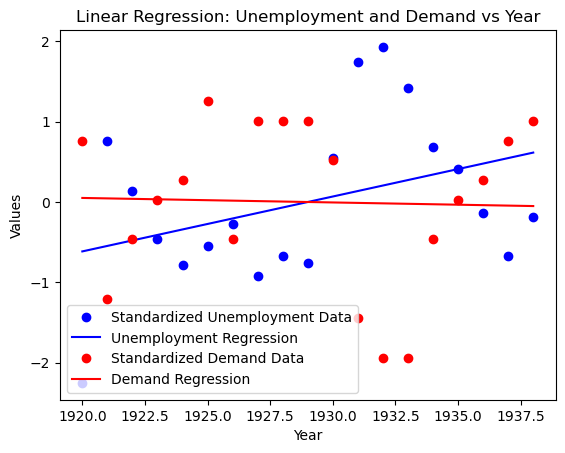

In [9]:
from sklearn.preprocessing import StandardScaler

correlation_coefficient_unemp_wages = np.corrcoef(column_unemp, column_wages)[0, 1]
correlation_coefficient_unemp_bwratio = np.corrcoef(column_unemp, column_bwratio)[0, 1]
correlation_coefficient_unemp_nnp = np.corrcoef(column_unemp, column_nnp)[0, 1]
correlation_coefficient_unemp_demand = np.corrcoef(column_unemp, column_demand)[0, 1]

print("Correlation of UNEMPLOYMENT with WAGES:", correlation_coefficient_unemp_wages)
print("Correlation of UNEMPLOYMENT with BWRATIO:", correlation_coefficient_unemp_bwratio)
print("Correlation of UNEMPLOYMENT with NNP:", correlation_coefficient_unemp_nnp)
print("Correlation of UNEMPLOYMENT with DEMAND: ", correlation_coefficient_unemp_demand)

# Data is flattened to make the correlation visible
unemp_standardized = StandardScaler().fit_transform(column_unemp.values.reshape(-1, 1)).flatten()
demand_standardized = StandardScaler().fit_transform(column_demand.values.reshape(-1, 1)).flatten()

slope_unemp, intercept_unemp, r_value_unemp, p_value_unemp, std_err_unemp = linregress(column_year, unemp_standardized)
regression_line_unemp = slope_unemp * column_year + intercept_unemp
slope_demand, intercept_demand, r_value_demand, p_value_demand, std_err_demand = linregress(column_year, demand_standardized)
regression_line_demand = slope_demand * column_year + intercept_demand

plt.plot(column_year, unemp_standardized, 'o', label='Standardized Unemployment Data', color='blue')
plt.plot(column_year, regression_line_unemp, label='Unemployment Regression', color='blue')

plt.plot(column_year, demand_standardized, 'o', label='Standardized Demand Data', color='red')
plt.plot(column_year, regression_line_demand, label='Demand Regression', color='red')

# Adding labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Linear Regression: Unemployment and Demand vs Year')
plt.legend()

# Display the plot
plt.show()

### 8. Summarize your findings. Optional: Consider the historical context of [BK79].

Through the graphs displayed above, we were able to conclude that periods with more unemployment were associated with lower wages, and higher benefits ratio. It is also seen that as unemployment increased, the demand, which is the trend of the national net product, stayed relatively stable, due to the gradually increasing benefits offered. 